В этом ноутбуке я отбираю оптимальное количество признаков для обучения итоговой модели

In [1]:
from model.dataloader import DataLoader
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'model.DataLoader'

In [2]:
num_cols = ['default', 'account_amount_added_12_24m', 'account_days_in_dc_12_24m',
            'account_days_in_rem_12_24m', 'account_days_in_term_12_24m', 'age',
            'avg_payment_span_0_12m', 'max_paid_inv_0_12m',
            'num_active_div_by_paid_inv_0_12m', 'num_active_inv',
            'num_arch_dc_0_12m', 'num_arch_dc_12_24m', 'num_arch_ok_0_12m',
            'num_arch_rem_0_12m', 'num_arch_written_off_0_12m',
            'num_arch_written_off_12_24m', 'num_unpaid_bills',
            'status_last_archived_0_24m', 'status_2nd_last_archived_0_24m',
            'status_3rd_last_archived_0_24m', 'status_max_archived_0_6_months',
            'status_max_archived_0_12_months', 'recovery_debt',
            'sum_capital_paid_account_0_12m', 'sum_capital_paid_account_12_24m',
            'sum_paid_inv_0_12m', 'time_hours']

cat_cols = ['merchant_category', 'merchant_group', 'has_paid', 'name_in_email']

dl = DataLoader(num_cols, cat_cols)
X_train, _, y_train, _ = dl.get_test_train_data()



In [14]:
def RFE_feature_selection(clf_lr, X, y):
    rfecv = RFECV(estimator=clf_lr, step=1, cv=StratifiedKFold(5), verbose=0, scoring='roc_auc')
    rfecv.fit(X, y)

    print(f"Оптимальное количество признаков : {rfecv.n_features_}")

    f, ax = plt.subplots(figsize=(14, 9))
    plt.xlabel("Количество признаков")
    plt.ylabel("roc_auc")
    plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
    plt.show()
    mask = rfecv.get_support()
    usefull_columns = X.columns[mask]
    return usefull_columns

Оптимальное количество признаков : 37


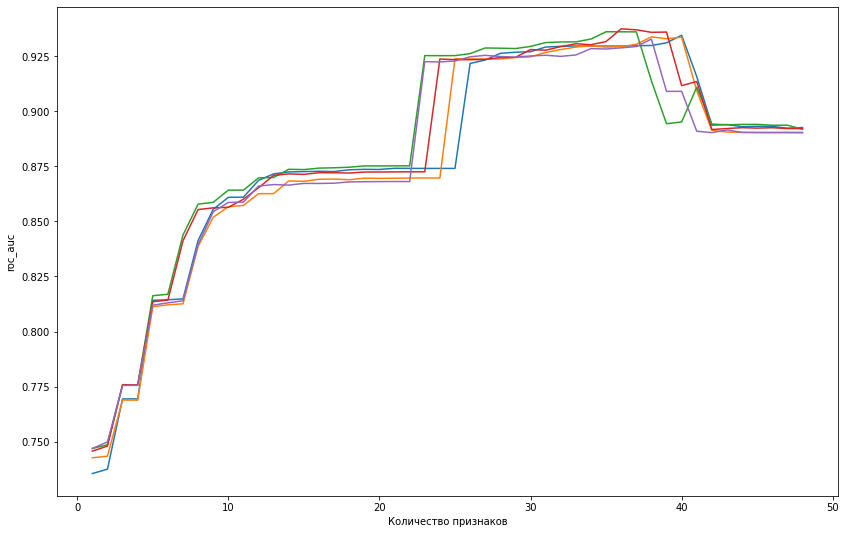

In [17]:
model = LogisticRegression()
usefull_cols = RFE_feature_selection(model, X_train, y_train)

In [18]:
usefull_cols

Index(['account_days_in_dc_12_24m', 'account_days_in_rem_12_24m', 'age',
       'avg_payment_span_0_12m', 'num_active_div_by_paid_inv_0_12m',
       'num_active_inv', 'num_arch_dc_0_12m', 'num_arch_dc_12_24m',
       'num_arch_ok_0_12m', 'num_arch_rem_0_12m', 'num_unpaid_bills',
       'status_last_archived_0_24m', 'status_2nd_last_archived_0_24m',
       'status_3rd_last_archived_0_24m', 'status_max_archived_0_6_months',
       'status_max_archived_0_12_months', 'time_hours', 'has_paid',
       'x0_Automotive Products', 'x0_Children Products', 'x0_Clothing & Shoes',
       'x0_Electronics', 'x0_Entertainment', 'x0_Erotic Materials',
       'x0_Food & Beverage', 'x0_Health & Beauty', 'x0_Home & Garden',
       'x0_Intangible products', 'x0_Jewelry & Accessories',
       'x0_Leisure, Sport & Hobby', 'x1_F', 'x1_F+L', 'x1_F1+L', 'x1_L',
       'x1_Nick', 'x1_no_match', 'merchant_category_freq_encode'],
      dtype='object')